Augment the literature data

In [1]:
# Load libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from modelval import pairptl, network, trainer, dataset, dw_gen
from modelval.ArbDataGen import arb_w_gen

import warnings
warnings.filterwarnings('ignore')

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
# Load data frame
data = pd.read_csv('/src/Plasticity_Ker/data/kernel_training_data_auto.csv')
data.head()

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste,train_len
0,1,1,0,1,0,60,1.0,-102.898046,0.0,0,-1.322590,0.0,60.0
1,1,1,0,1,0,60,1.0,-75.579896,0.0,0,2.674768,0.0,60.0
2,1,1,0,1,0,60,1.0,-80.871473,0.0,0,-12.696449,0.0,60.0
3,1,1,0,1,0,60,1.0,-67.562239,0.0,0,0.231446,0.0,60.0
4,1,1,0,1,0,60,1.0,-63.553410,0.0,0,-0.990216,0.0,60.0


In [3]:
# Generate data for STDP
data1 = data[data['ptl_idx']==1]
data1_gen, targets1 = dw_gen.STDP_dw_gen(n_neighbors=3)

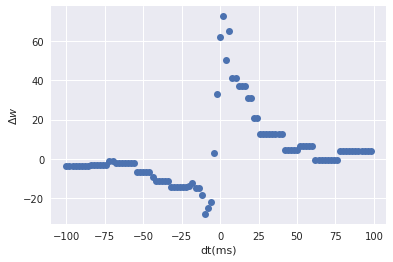

In [4]:
plt.plot(data1_gen['dt1'], targets1,'o')
plt.xlabel('dt(ms)')
plt.ylabel('$\Delta w$')

In [5]:
# Visualize ptl1
data2 = data[data['ptl_idx']==2]
# X = np.array([data1['dt1'], data1['dw_mean']]).reshape((-1,2))
X = np.array(data1['dt1']).reshape(-1,1)
y = np.array(data1['dw_mean']).reshape(-1,1)

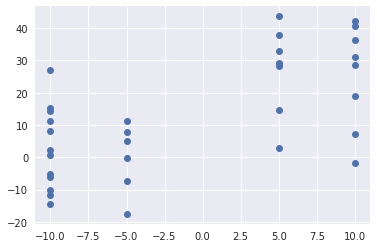

In [6]:
plt.plot(data2['dt1'], data2['dw_mean'], 'o')
#plt.axis([-110, 100, -50, 120])

In [ ]:
# Generate dt1
# Insert values for STDP
# dt = np.concatenate([np.arange(-10,-4,1).reshape(-1,1), np.zeros((1,1)), np.arange(5,11,1).reshape(-1,1)])
dt = np.array([-10, -5, 0, 5, 10]).reshape(-1,1)
data2_gen = pd.DataFrame(data=None, columns=list(data.columns))
for i in range(len(dt)):
    new_try2 = data2.iloc[0]
    if dt[i] < 0:
        new_try2['dt1'] = dt[i]
        new_try2['dt2'] = dt[i]
        new_try2['dw_mean'] =  data2[data2['dt1']<0]['dw_mean'].mean()
    if dt[i] == 0:
        new_try2['dt1'] = dt[i]
        new_try2['dt2'] = dt[i]
        new_try2['dw_mean'] =  60
    elif dt[i] > 0:
        new_try2['dt1'] = dt[i]
        new_try2['dt2'] = dt[i]
        new_try2['dw_mean'] =  data2[data2['dt1']>0]['dw_mean'].mean()
        
    data2_gen = data2_gen.append(new_try2, ignore_index=True)

targets2 = np.array(data2_gen['dw_mean']).reshape(-1,1)

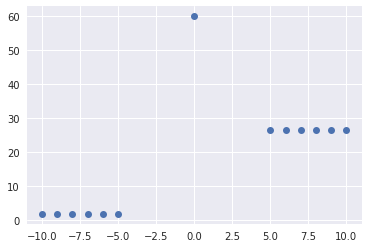

In [8]:
plt.plot(data2_gen['dt1'], data2_gen['dw_mean'], 'o')

In [9]:
data3 = data[data['ptl_idx']==4]
data3_gen = data3
targets3 = np.array(data3['dw_mean']).reshape(-1,1)

In [10]:
print(len(data1_gen), len(data2_gen), len(data3_gen) )

100 13 4


In [11]:
data_gen = pd.concat([data1_gen, data2_gen, data3_gen])
targets = np.concatenate([targets1, targets2, targets3])

In [12]:
data_gen.head()

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste,train_len
0,1.0,1.0,0.0,1.0,0.0,60.0,1.0,-100.0,0.0,0.0,-1.32259,0.0,60.0
1,1.0,1.0,0.0,1.0,0.0,60.0,1.0,-98.0,0.0,0.0,-1.32259,0.0,60.0
2,1.0,1.0,0.0,1.0,0.0,60.0,1.0,-96.0,0.0,0.0,-1.32259,0.0,60.0
3,1.0,1.0,0.0,1.0,0.0,60.0,1.0,-94.0,0.0,0.0,-1.32259,0.0,60.0
4,1.0,1.0,0.0,1.0,0.0,60.0,1.0,-92.0,0.0,0.0,-1.32259,0.0,60.0


In [13]:
list(data.columns)

['ptl_idx',
 'pre_spk_num',
 'pre_spk_freq',
 'post_spk_num',
 'post_spk_freq',
 'ptl_occ',
 'ptl_freq',
 'dt1',
 'dt2',
 'dt3',
 'dw_mean',
 'dw_ste',
 'train_len']

In [14]:
trip_para = pd.read_pickle('/src/Plasticity_Ker/data/Gerstner_trip_para_df')
trip_para
# Reorder columns to match parameter of the model
trip_para = trip_para[['A2_+', 'A3_-', 'A2_-', 'A3_+', 'Tau_+', 'Tau_x', 'Tau_-', 'Tau_y']]
trip_para

A2_+     A3_-    A2_-    A3_+ Tau_+ Tau_x Tau_-  \
Visu_AlltoAll    Full    5e-10  0.00023   0.007  0.0062  16.8   101  33.7   
                 Min         0        0  0.0071  0.0065  16.8     1  33.7   
Visu_NearestSpk  Full  8.8e-11   0.0031  0.0066   0.053  16.8   714  33.7   
                 Min         0        0   0.008    0.05  16.8     1  33.7   
Hippo_AlltoAll   Full   0.0061   0.0014  0.0016  0.0067  16.8   946  33.7   
                 Min    0.0053        0  0.0035   0.008  16.8     1  33.7   
Hippo_NearestSpk Full   0.0046  7.5e-09   0.003  0.0091  16.8   575  33.7   
                 Min    0.0046        0   0.003  0.0091  16.8     1  33.7   

                      Tau_y  
Visu_AlltoAll    Full   125  
                 Min    114  
Visu_NearestSpk  Full    40  
                 Min     40  
Hippo_AlltoAll   Full    27  
                 Min     40  
Hippo_NearestSpk Full    47  
                 Min     48

1.0 1.0


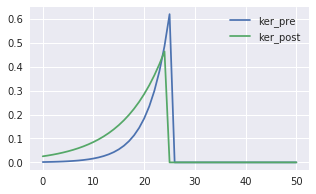

In [15]:
# Visualize kernel
from modelval.kernel import KernelGen
plt.figure(figsize=(5,3))
ker_test = KernelGen()

para = trip_para.loc[('Hippo_AlltoAll', 'Full'), :]
a = para[:4].values
tau = para[4:].values
reso_set = 2
tau_pre_post = tau[0]/reso_set  # ms
tau_post_pre = tau[2]/reso_set # ms

ker_test = KernelGen()
ker_test.trip_model_ker(para, data_name='Hippocampus')
plt.plot(ker_test.kernel_pre, label='ker_pre')
plt.plot(ker_test.kernel_post, label='ker_post')
plt.legend()
print(np.linalg.norm(ker_test.kernel_pre, ord=2), np.linalg.norm(ker_test.kernel_post, ord=2))

In [16]:
ptl_list = [1,3,4]
spk_len = int(data_gen['train_len'].max() * 1000 / ker_test.reso_kernel)
spk_pairs, targets = arb_w_gen(df=data_gen, ptl_list=ptl_list, targets=targets, spk_len=spk_len, kernel=ker_test, aug_times=[10,30,30])

In [17]:
# # np.save('/src/Plasticity_Ker/data/spk_pairs.npy', spk_pairs)
# # np.save('/src/Plasticity_Ker/data/targets.npy', targets)
# spk_pairs = np.load('/src/Plasticity_Ker/data/spk_pairs.npy')
# targets = np.load('/src/Plasticity_Ker/data/targets.npy')

In [26]:
spk_pairs.shape

(1120, 30000, 2)

In [27]:
# Create the network
ground_truth_init = 0
toy_data_net = network.TripNet(kernel=ker_test, ground_truth_init=ground_truth_init, n_input=spk_pairs.shape[1])

In [28]:
# Create the trainer
save_dir= '/src/Plasticity_Ker/model/Trip_ptl1-3-4_real_aug'
toy_net_trainer = trainer.Trainer(toy_data_net.loss, toy_data_net.loss, input_name=toy_data_net.inputs, target_name=toy_data_net.target, save_dir=save_dir, optimizer_config={'learning_rate': toy_data_net.lr})

In [29]:
# Obtain the training and validation data
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(spk_pairs, targets, test_size=0.1)
X_train, X_vali, y_train, y_vali = train_test_split(X_train_val,  y_train_val, test_size=0.1)
train_data = dataset.Dataset(X_train, y_train)
vali_data = dataset.Dataset(X_vali, y_vali)

array([-0.22614121, -0.27994752], dtype=float32)

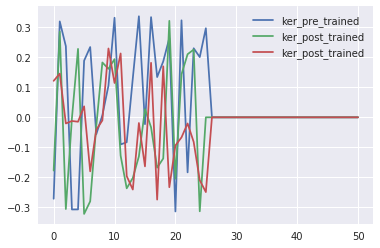

In [30]:
w_pre = toy_net_trainer.evaluate(ops=toy_data_net.kernel_pre)
w_post = toy_net_trainer.evaluate(ops=toy_data_net.kernel_post)
w_post_post = toy_net_trainer.evaluate(ops=toy_data_net.kernel_post_post)
fc_w = toy_net_trainer.evaluate(ops=toy_data_net.fc_w)
plt.plot(w_pre,  label='ker_pre_trained')
plt.plot(w_post,  label='ker_post_trained')
plt.plot(w_post_post,  label='ker_post_trained')
plt.legend()
fc_w[:2]

In [37]:
# Learn the kernel from random initialization
learning_rate = 0.001
iterations = 5
min_error = -1
for i in range(iterations):
    toy_net_trainer.train(train_data, vali_data, batch_size=128, min_error=min_error, feed_dict={toy_data_net.lr: learning_rate})
    learning_rate = learning_rate/3

Global Step 2850 and Step 0026: validation cost=22.07582
Updated min validation loss!Saving model...
Global Step 2900 and Step 0076: validation cost=22.05525
Updated min validation loss!Saving model...
Global Step 2950 and Step 0126: validation cost=22.12959
Global Step 3000 and Step 0176: validation cost=22.22589
Global Step 3050 and Step 0226: validation cost=22.40527
Global Step 3100 and Step 0276: validation cost=22.42515
Global Step 3150 and Step 0326: validation cost=22.47157
Global Step 3200 and Step 0376: validation cost=22.61257
Global Step 3250 and Step 0426: validation cost=22.67566
Global Step 3300 and Step 0476: validation cost=22.72162
Global Step 3350 and Step 0526: validation cost=22.80980
Global Step 3400 and Step 0576: validation cost=22.82539
Global Step 3450 and Step 0626: validation cost=22.83667
Global Step 3500 and Step 0676: validation cost=22.93482
Global Step 3550 and Step 0726: validation cost=23.01182
Global Step 3600 and Step 0776: validation cost=23.02641


KeyboardInterrupt: 

array([-1.12616909, -1.01147032,  1.2931087 ], dtype=float32)

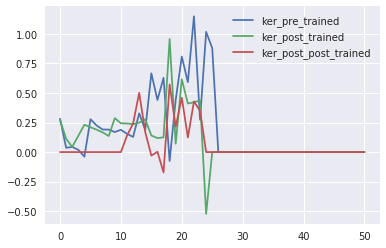

In [38]:
toy_net_trainer.restore_best()
w_pre = toy_net_trainer.evaluate(ops=toy_data_net.kernel_pre)
w_post = toy_net_trainer.evaluate(ops=toy_data_net.kernel_post)
w_post_post = toy_net_trainer.evaluate(ops=toy_data_net.kernel_post_post)
fc_w = toy_net_trainer.evaluate(ops=toy_data_net.fc_w)
plt.plot(-1 * w_pre, label='ker_pre_trained')
plt.plot(-1 * w_post, label='ker_post_trained')
plt.plot(w_post_post, label='ker_post_post_trained')
plt.legend()
fc_w

In [48]:
# Compare the target and prediction

In [49]:
ker_test.kernel_pre = w_pre
ker_test.kernel_post = w_post
ker_test.kernel_scale = fc_w

In [52]:
ptl_list = [1]
spk_len = int(data1_gen['train_len'].max() * 1000 / ker_test.reso_kernel)
spk_pairs, predictions = arb_w_gen(df=data1_gen, ptl_list=ptl_list, spk_len=spk_len, kernel=ker_test, aug_times=[20])

In [53]:
# np.save('/src/Plasticity_Ker/data/predictions.npy', predictions)
# predictions = np.load('/src/Plasticity_Ker/data/predictions.npy')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


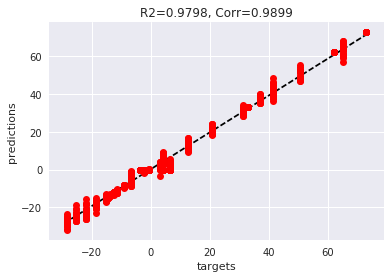

In [54]:
# Calculate R square
R2 = 1 - np.sum(np.square(predictions - targets))/np.sum(np.square(targets - np.mean(targets)))
# Calculate correlation coefficient
corr = np.sum(np.dot((predictions - np.mean(predictions)).T, targets - np.mean(targets)))/np.std(predictions)/np.std(targets)/len(targets)
b1 = np.sum(np.dot((predictions - np.mean(predictions)).T, targets - np.mean(targets)))/np.sum(np.square(targets - np.mean(targets)))
b2 = np.mean(predictions) - np.mean(targets)*b1
x_fit = np.linspace(np.min(targets)-1, np.max(targets)+1, 100)
y_fit = x_fit * b1 + b2
plt.plot(x_fit, y_fit, 'k--')
plt.plot(targets, predictions, 'ro')
plt.xlabel('targets')
plt.ylabel('predictions')
plt.title(''.join(('R2=%.4f'%(R2), ', Corr=%.4f'%(corr))))

Generate test restuls

In [55]:
ptl_list = [1]
spk_len = int(data1_gen['train_len'].max() * 1000 / ker_test.reso_kernel)
spk_pairs, predictions = arb_w_gen(spk_pairs=X_test, df=data1_gen, ptl_list=ptl_list, spk_len=spk_len, kernel=ker_test, aug_times=[20])

In [56]:
targets = y_test

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


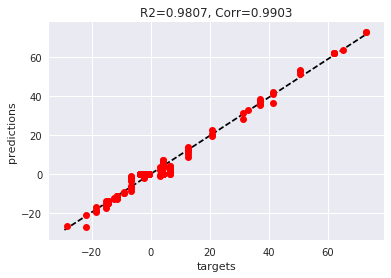

In [57]:
# Calculate R square
R2 = 1 - np.sum(np.square(predictions - targets))/np.sum(np.square(targets - np.mean(targets)))
# Calculate correlation coefficient
corr = np.sum(np.dot((predictions - np.mean(predictions)).T, targets - np.mean(targets)))/np.std(predictions)/np.std(targets)/len(targets)
b1 = np.sum(np.dot((predictions - np.mean(predictions)).T, targets - np.mean(targets)))/np.sum(np.square(targets - np.mean(targets)))
b2 = np.mean(predictions) - np.mean(targets)*b1
x_fit = np.linspace(np.min(targets)-1, np.max(targets)+1, 100)
y_fit = x_fit * b1 + b2
plt.plot(x_fit, y_fit, 'k--')
plt.plot(targets, predictions, 'ro')
plt.xlabel('targets')
plt.ylabel('predictions')
plt.title(''.join(('R2=%.4f'%(R2), ', Corr=%.4f'%(corr))))